In [1]:
import pandas as pd
import pylab as pl
import numpy as np
import scipy.optimize as opt
from sklearn import preprocessing
%matplotlib inline
import matplotlib.pyplot as plt

In [14]:
#We will use a telecommunications dataset for predicting customer churn. This is a historical customer dataset where each row represents one customer. 
#Typically it is less expensive to keep customers than acquire new ones, so the focus of this analysis is to predict the customers who will stay with the company.
#churn- customers who left within the last month

data = pd.read_csv("~/Downloads/ChurnData.csv")
data.head() #show data 

,tenure,age,address,income,ed,employ,equip,callcard,wireless,longmon,...,pager,internet,callwait,confer,ebill,loglong,logtoll,lninc,custcat,churn
0,11.0,33.0,7.0,136.0,5.0,5.0,0.0,1.0,1.0,4.40,...,1.0,0.0,1.0,1.0,0.0,1.482,3.033,4.913,4.0,1.0
1,33.0,33.0,12.0,33.0,2.0,0.0,0.0,0.0,0.0,9.45,...,0.0,0.0,0.0,0.0,0.0,2.246,3.240,3.497,1.0,1.0
2,23.0,30.0,9.0,30.0,1.0,2.0,0.0,0.0,0.0,6.30,...,0.0,0.0,0.0,1.0,0.0,1.841,3.240,3.401,3.0,0.0
3,38.0,35.0,5.0,76.0,2.0,10.0,1.0,1.0,1.0,6.05,...,1.0,1.0,1.0,1.0,1.0,1.800,3.807,4.331,4.0,0.0
4,7.0,35.0,14.0,80.0,2.0,15.0,0.0,1.0,0.0,7.10,...,0.0,0.0,1.0,1.0,0.0,1.960,3.091,4.382,3.0,0.0


In [15]:
data.describe

<bound method NDFrame.describe of      tenure   age  address  income   ed  employ  equip  callcard  wireless  \
0      11.0  33.0      7.0   136.0  5.0     5.0    0.0       1.0       1.0   
1      33.0  33.0     12.0    33.0  2.0     0.0    0.0       0.0       0.0   
2      23.0  30.0      9.0    30.0  1.0     2.0    0.0       0.0       0.0   
3      38.0  35.0      5.0    76.0  2.0    10.0    1.0       1.0       1.0   
4       7.0  35.0     14.0    80.0  2.0    15.0    0.0       1.0       0.0   
..      ...   ...      ...     ...  ...     ...    ...       ...       ...   
195    55.0  44.0     24.0    83.0  1.0    23.0    0.0       1.0       0.0   
196    34.0  23.0      3.0    24.0  1.0     7.0    0.0       1.0       0.0   
197     6.0  32.0     10.0    47.0  1.0    10.0    0.0       1.0       0.0   
198    24.0  30.0      0.0    25.0  4.0     5.0    0.0       1.0       1.0   
199    61.0  50.0     16.0   190.0  2.0    22.0    1.0       1.0       1.0   

     longmon  ...  pager  int

In [16]:
#selecting columns
data = data[['tenure','age','address','income','ed','employ','equip','callcard',
             'wireless','churn']]
data['churn']= data['churn'].astype('int') #changing datatype of churn to int
data.head()

/Users/hanacho/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,tenure,age,address,income,ed,employ,equip,callcard,wireless,churn
0,11.0,33.0,7.0,136.0,5.0,5.0,0.0,1.0,1.0,1
1,33.0,33.0,12.0,33.0,2.0,0.0,0.0,0.0,0.0,1
2,23.0,30.0,9.0,30.0,1.0,2.0,0.0,0.0,0.0,0
3,38.0,35.0,5.0,76.0,2.0,10.0,1.0,1.0,1.0,0
4,7.0,35.0,14.0,80.0,2.0,15.0,0.0,1.0,0.0,0


In [18]:
data.shape #show num of rows and columns

(200, 10)

# Define X and Y 

In [25]:
#all independent variables; continuous
X = np.asarray(data[['tenure', 'age', 'address', 'income', 'ed', 'employ', 'equip']])
X[0:5]

array([[ 11.,  33.,   7., 136.,   5.,   5.,   0.],
       [ 33.,  33.,  12.,  33.,   2.,   0.,   0.],
       [ 23.,  30.,   9.,  30.,   1.,   2.,   0.],
       [ 38.,  35.,   5.,  76.,   2.,  10.,   1.],
       [  7.,  35.,  14.,  80.,   2.,  15.,   0.]])

In [21]:
#dependent variable; an outcome; a categorical
y = np.asarray(data[['churn']])
y[0:5]

array([[1],
       [1],
       [0],
       [0],
       [0]])

In [24]:
#normalize the dataset
from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[-1.13518441, -0.62595491, -0.4588971 ,  0.4751423 ,  1.6961288 ,
        -0.58477841, -0.85972695],
       [-0.11604313, -0.62595491,  0.03454064, -0.32886061, -0.6433592 ,
        -1.14437497, -0.85972695],
       [-0.57928917, -0.85594447, -0.261522  , -0.35227817, -1.42318853,
        -0.92053635, -0.85972695],
       [ 0.11557989, -0.47262854, -0.65627219,  0.00679109, -0.6433592 ,
        -0.02518185,  1.16316   ],
       [-1.32048283, -0.47262854,  0.23191574,  0.03801451, -0.6433592 ,
         0.53441472, -0.85972695]])

# Train and Test dataset

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state=4)

In [29]:
print('Train set:', X_train.shape, y_train.shape)

Train set: (160, 7) (160, 1)


In [30]:
print('Test set:', X_test.shape, y_test.shape)

Test set: (40, 7) (40, 1)


# Modeling

In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

In [34]:
#fit the model with train set
LR = LogisticRegression(C= 0.01, solver= 'liblinear').fit(X_train, y_train)

/Users/hanacho/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [33]:
LR

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [37]:
#predict using the test set
yhat = LR.predict(X_test)
yhat

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0])

In [47]:
#estimate classes
yhat_prob = LR.predict_proba(X_test)
yhat_prob

array([[0.86, 0.14],
       [0.87, 0.13],
       [0.76, 0.24],
       [0.9 , 0.1 ],
       [0.73, 0.27],
       [0.52, 0.48],
       [0.63, 0.37],
       [0.87, 0.13],
       [0.42, 0.58],
       [0.91, 0.09],
       [0.91, 0.09],
       [0.95, 0.05],
       [0.46, 0.54],
       [0.51, 0.49],
       [0.86, 0.14],
       [0.84, 0.16],
       [0.69, 0.31],
       [0.84, 0.16],
       [0.77, 0.23],
       [0.63, 0.37],
       [0.86, 0.14],
       [0.65, 0.35],
       [0.93, 0.07],
       [0.56, 0.44],
       [0.8 , 0.2 ],
       [0.95, 0.05],
       [0.78, 0.22],
       [0.81, 0.19],
       [0.6 , 0.4 ],
       [0.96, 0.04],
       [0.9 , 0.1 ],
       [0.88, 0.12],
       [0.42, 0.58],
       [0.91, 0.09],
       [0.88, 0.12],
       [0.75, 0.25],
       [0.37, 0.63],
       [0.55, 0.45],
       [0.97, 0.03],
       [0.86, 0.14]])

# Evaulation

In [41]:
#jaccard index for accuracy evalution 

from sklearn.metrics import jaccard_similarity_score
jaccard_similarity_score(y_test, yhat)

0.675

In [42]:
#confusion matrix
from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
print(confusion_matrix(y_test, yhat, labels=[1,0]))


[[ 3 12]
 [ 1 24]]


Confusion matrix, without normalization
[[ 3 12]
 [ 1 24]]


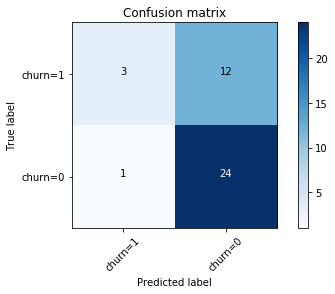

In [43]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat, labels=[1,0])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['churn=1','churn=0'],normalize= False,  title='Confusion matrix')

In [44]:
print (classification_report(y_test, yhat))

#Precision is a measure of the accuracy provided that a class label has been predicted. It is defined by: precision = TP / (TP + FP)
#Recall is true positive rate. It is defined as: Recall =  TP / (TP + FN)

              precision    recall  f1-score   support

           0       0.67      0.96      0.79        25
           1       0.75      0.20      0.32        15

    accuracy                           0.68        40
   macro avg       0.71      0.58      0.55        40
weighted avg       0.70      0.68      0.61        40



In [48]:
#log loss for evaluation to measure performance of a clssifier
#predicted output is probability value bewteen 0 and 1
    
from sklearn.metrics import log_loss
log_loss(y_test, yhat_prob)

0.5633358354744319